<a href="https://colab.research.google.com/github/younghoonNa/Kaggle_Data_analysis/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%BD%94%EB%A1%9C%EB%82%98%ED%99%95%EC%A7%84%EC%9E%90%EC%88%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=red> 과제는 프로그램 맨 아래 부분에 빨간색으로 적혀 있음  
이 프로그램을 분석해서 이해하고, 한국 코로나 확진자 수를 예측하는 문제임.  
이 코드는 www.kaggle.com 에서 'covid'로 탐색해서 나온 것들 중에서  
Coronavirus (COVID-19) Visualization & Prediction 이라는 notebook을 가져와서 수정한 것임.

=============================================================================


# Coronavirus (COVID-19) Visualization & Prediction  
Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 through data analysis and projections. 

   Coronavirus Case Data is provided by <a href='https://github.com/CSSEGISandData/COVID-19'>Johns Hopkins University</a>
   <br>Mobility data is provided by <a href='https://www.apple.com/covid19/mobility'>Apple</a>
   <br>Learn more from the <a href='https://www.who.int/emergencies/diseases/novel-coronavirus-2019'>World Health Organization</a>
   <br>Learn more from the <a href='https://www.cdc.gov/coronavirus/2019-ncov'>Centers for Disease Control and Prevention</a>
   <br>Check out map visualizations from  <a href='https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6'>JHU CCSE Dashboard</a>
   <br>Source code is also on <a href='https://github.com/therealcyberlord'>my Github</a>
   <br> Last update: **10/1/2021 6:56 PM ET**. 
   <br> New Updates: Daily report data update for **10/1**. time series data update for **9/30**. Mobility data update for **9/30**. 
   <br>Changes to the prediction model, now the first day of the training data is 2/1/2021 instead of 1/22/2020. This is adjusted based on the recent progress in vaccinations. Removed NAN values from the data table. 
   <br><br>**Please disregard the active cases for the US. **
    <br>Thank you guys for 360K!
   
* <a href='#world_wide_graphs'>Exploring Global Coronavirus Cases</a>
* <a href='#country_graphs'>Exploring Coronavirus Cases From Different Countries</a>
* <a href='#prediction'>Worldwide Confirmed Cases Prediction</a>
* <a href='#data_table'>Data Table</a>
* <a href='#pie_charts'>Pie Charts</a>
* <a href='#bar_charts'>Bar Charts</a>
* <a href='#hospital_testing'>US Testing Data</a>
* <a href='#mobility_data'>Mobility Data for Hotspots</a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('seaborn-poster')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

Import the data (make sure you update this on a daily basis)

In [ ]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-30-2021.csv')
#us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/09-30-2021.csv')
#apple_mobility = pd.read_csv("https://covid19-static.cdn-apple.com/covid19-mobility-data/2118HotfixDev8/v3/en-us/applemobilitytrends-2021-09-30.csv")

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259


In [ ]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/26/21', '11/27/21', '11/28/21', '11/29/21', '11/30/21', '12/1/21',
       '12/2/21', '12/3/21', '12/4/21', '12/5/21'],
      dtype='object', length=688)

In [ ]:
korea = confirmed_df.loc[confirmed_df.index[confirmed_df['Country/Region'] == "Korea, South"]]
korea_d = deaths_df.loc[deaths_df.index[deaths_df['Country/Region'] == "Korea, South"]]
korea

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
160,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,...,358412,360536,362639,364700,366386,367974,370640,373120,375464,377712,379935,381694,383407,385831,388351,390719,393042,395460,397466,399591,402775,406065,409099,412311,415425,418252,420950,425065,429002,432901,436968,440896,444200,447230,452350,457612,457612,467907,473034,477358


In [ ]:
korea_d

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
160,NaN,"Korea, South",35.907757,127.766922,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,6,8,10,12,...,2808,2817,2830,2849,2858,2874,2892,2916,2936,2956,2967,2980,2998,3012,3033,3051,3083,3103,3115,3137,3158,3187,3215,3244,3274,3298,3328,3363,3401,3440,3492,3548,3580,3624,3659,3705,3705,3809,3852,3893



Get all the dates for the ongoing coronavirus pandemic 

In [ ]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

K_confirmed = korea.loc[:, cols[4]:cols[-1]]
K_deaths = korea_d.loc[:, cols[4]:cols[-1]]
# recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [ ]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739,156739,156812,156864,156896,156911,157015,157032,157144,157171,157190,157218,157260,157289,157359,157387,157412,157431,157445
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472,195021,195523,195988,195988,196611,197167,197776,198292,198732,199137,199555,199750,199945,200173,200639,201045,201402,201730
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380,208532,208695,208839,208952,209111,209283,209463,209624,209817,209980,210152,210344,210531,210723,210921,211112,211297,211469
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972,16035,16086,16086,16086,16299,16342,16426,16566,16712,16712,16712,16712,17115,17426,17658,18010,18010,18010
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968,64985,64997,65011,65024,65033,65061,65080,65105,65130,65139,65144,65155,65168,65183,65208,65223,65244,65259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,900585,905477,910376,915603,921122,926720,932357,939463,946043,953547,961038,968684,976672,984805,992735,1000897,1009879,1018346,1026522,1035138,1045397,1055246,1065469,1075094,1084625,1094514,1104835,1143967,1155778,1168228,1181337,1197404,1210340,1224110,1238082,1252590,1266288,1280780,1294778,1309092
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,452272,452642,452997,452997,452997,453782,454172,454509,454799,455099,455099,455099,455689,455949,456186,456407,456632,456632,456632,457154,457390,457477,457729,457950,457950,457950,458448,458698,458956,459213,459479,459479,459479,460053,460053,460799,461157,461467,461467,461467
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9728,9751,9773,9779,9791,9799,9806,9810,9831,9843,9858,9870,9883,9891,9902,9907,9912,9918,9918,9936,9936,9947,9950,9954,9955,9955,9961,9967,9972,9977,9979,9981,9987,9995,10004,10006,10006,10020,10021,10025
278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,209657,209672,209702,209722,209734,209739,209760,209781,209815,209852,209869,209902,209908,20

In [ ]:
K_confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
160,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,...,358412,360536,362639,364700,366386,367974,370640,373120,375464,377712,379935,381694,383407,385831,388351,390719,393042,395460,397466,399591,402775,406065,409099,412311,415425,418252,420950,425065,429002,432901,436968,440896,444200,447230,452350,457612,457612,467907,473034,477358


In [ ]:
K_deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21,11/18/21,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21,11/29/21,11/30/21,12/1/21,12/2/21,12/3/21,12/4/21,12/5/21
160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,6,8,10,12,13,13,16,17,...,2808,2817,2830,2849,2858,2874,2892,2916,2936,2956,2967,2980,2998,3012,3033,3051,3083,3103,3115,3137,3158,3187,3215,3244,3274,3298,3328,3363,3401,3440,3492,3548,3580,3624,3659,3705,3705,3809,3852,3893


In [ ]:
dates = confirmed.keys()
world_cases = []
korea_cases = []
korea_deaths = []
total_deaths = [] 
mortality_rate = []
# recovery_rate = [] 
# total_recovered = [] 
# total_active = [] 


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()

    K_confirmed_sum = K_confirmed[i].sum()
    K_death_sum = K_deaths[i].sum()
#     recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)

    #korea Case #korea Case #korea Case #korea Case #korea Case #korea Case #korea Case #korea Case #korea Case #korea Case
    korea_cases.append(K_confirmed_sum)
    
    korea_deaths.append(K_death_sum)
#     total_recovered.append(recovered_sum)
#     total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
#     recovery_rate.append(recovered_sum/confirmed_sum)

Getting daily increases and moving averages

In [ ]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

korea_daily_increase = daily_increase(korea_cases)
korea_confiremd_avg = moving_average(korea_cases, window)
korea_daily_increase_avg = moving_average(korea_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

korea_daily_death = daily_increase(korea_deaths)
korea_death_avg = moving_average(korea_deaths, window)
korea_daily_death_avg = moving_average(korea_daily_death, window)

# recoveries
# world_daily_recovery = daily_increase(total_recovered)
# world_recovery_avg = moving_average(total_recovered, window)
# world_daily_recovery_avg = moving_average(world_daily_recovery, window)


# active 
# world_active_avg = moving_average(total_active, window)

In [ ]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
korea_cases = np.array(korea_cases).reshape(-1, 1)
korea_deaths = np.array(korea_deaths).reshape(-1, 1)
# total_recovered = np.array(total_recovered).reshape(-1, 1)

Future forcasting

In [ ]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [ ]:
print(type(future_forcast))
print(type(adjusted_dates))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
days_since_1_22[-3:], future_forcast[-3:], adjusted_dates[-3:]

(array([[681],
        [682],
        [683]]), array([[691],
        [692],
        [693]]), array([[681],
        [682],
        [683]]))

Convert integer into datetime for better visualization

In [ ]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [ ]:
print(future_forcast[-3:], future_forcast_dates[-3:])

[[691]
 [692]
 [693]] ['12/13/2021', '12/14/2021', '12/15/2021']


In [ ]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
days_to_skip = 376
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.08, shuffle=False) 

# X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], korea_cases[days_to_skip:], test_size=0.08, shuffle=False) 
koreaX_train_confirmed, koreaX_test_confirmed, koreaY_train_confirmed, koreaY_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], korea_cases[days_to_skip:], test_size=0.08, shuffle=False) 
# X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[days_to_skip:], korea_cases[days_to_skip:], test_size=0.08, shuffle=False) 

In [ ]:
print(X_train_confirmed[-3:], X_train_confirmed.shape)
print(y_train_confirmed[-3:], y_train_confirmed.shape)
print(X_test_confirmed[:3], X_test_confirmed[-3:],X_test_confirmed.shape)
print(y_test_confirmed[:3], y_test_confirmed.shape)

[[656]
 [657]
 [658]] (283, 1)
[[250821737]
 [251304831]
 [251879214]] (283, 1)
[[659]
 [660]
 [661]] [[681]
 [682]
 [683]] (25, 1)
[[252395307]
 [252989981]
 [253418652]] (25, 1)


In [ ]:
print(koreaX_train_confirmed[-3:], koreaX_train_confirmed.shape)
print(koreaY_train_confirmed[-3:], koreaY_train_confirmed.shape)
print(koreaX_test_confirmed[:3], koreaX_test_confirmed[-3:],koreaX_test_confirmed.shape)
print(koreaY_test_confirmed[:3], koreaY_test_confirmed.shape)

[[656]
 [657]
 [658]] (283, 1)
[[383407]
 [385831]
 [388351]] (283, 1)
[[659]
 [660]
 [661]] [[681]
 [682]
 [683]] (25, 1)
[[390719]
 [393042]
 [395460]] (25, 1)


### 확진자(confirmed cases) 수 모델들 학습 
support vector machine, bayesian ridge , and linear regression  
모델이 어떻게 동작하는지 자세히 몰라도 fit()로 학습, predict()로 추론 하면 사용할 수 있음.  
여기서는 학습이 잘 되었는지만 확인함.  학습된 모델들은 뒤에서 사용함

#### 모델 1 : SVM (support vector machine)

In [ ]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
Ksvm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
Ksvm_confirmed.fit(koreaX_train_confirmed, koreaY_train_confirmed)

print(type(future_forcast))

# 추론 : 현재까지 데이터 + 앞으로 10일까지.  결과는 프로그램 마랫부분에서 사용할 예정
svm_pred = svm_confirmed.predict(future_forcast)
Ksvm_pred = Ksvm_confirmed.predict(future_forcast)

<class 'numpy.ndarray'>


In [ ]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
Ksvm_test_pred = Ksvm_confirmed.predict(koreaX_test_confirmed)

print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

print('Korea_MAE:', mean_absolute_error(Ksvm_test_pred, koreaY_test_confirmed))
print('Korea_MSE:',mean_squared_error(Ksvm_test_pred, koreaY_test_confirmed))

MAE: 25467154.45990063
MSE: 654542967155378.9
Korea_MAE: 40846.196422759356
Korea_MSE: 1846674331.9148648


#### 모델 2 : Polynomial regression

In [ ]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=2)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

#korean
poly_Korean_X_train_confirmed = poly.fit_transform(koreaX_train_confirmed)
poly_Korean_X_test_confirmed = poly.fit_transform(koreaX_test_confirmed)
poly_Korean_future_forcast = poly.fit_transform(future_forcast)


bayesian_poly = PolynomialFeatures(degree=2)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)


#korean Polynomal
bayesian_poly = PolynomialFeatures(degree=2)
bayesian_poly_Korean_X_train_confirmed = bayesian_poly.fit_transform(koreaX_train_confirmed)
bayesian_poly_Korean_X_test_confirmed = bayesian_poly.fit_transform(koreaX_test_confirmed)
bayesian_poly_Korean_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [ ]:
# polynomial regression 학습
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)

korean_linear_model = LinearRegression(normalize=True, fit_intercept=False)
korean_linear_model.fit(poly_Korean_X_train_confirmed, koreaY_train_confirmed)

print(linear_model.coef_)
print(korean_linear_model.coef_)

[[-1.46637617e+08  7.15566992e+05 -1.63275235e+02]]
[[ 7.10140721e+05 -3.19388430e+03  4.11500476e+00]]


In [ ]:
# 일부 데이터에 대해 시험
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

# 일부 데이터에 대해 시험
Korea_test_linear_pred = korean_linear_model.predict(poly_Korean_X_test_confirmed)
korea_linear_pred = korean_linear_model.predict(poly_Korean_future_forcast)
print('K_MAE:', mean_absolute_error(Korea_test_linear_pred, koreaY_test_confirmed))
print('K_MSE:',mean_squared_error(Korea_test_linear_pred, koreaY_test_confirmed))

MAE: 1049256.5641615987
MSE: 1397706866472.6921
K_MAE: 8869.790331967533
K_MSE: 153515822.1591608


#### 모델 3 : bayesian ridge polynomial regression

In [ ]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Korean_bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
Korean_bayesian_search.fit(bayesian_poly_Korean_X_train_confirmed, koreaY_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
bayesian_search.best_params_
Korean_bayesian_search.best_params_

{'alpha_1': 1e-07,
 'alpha_2': 1e-07,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'normalize': False,
 'tol': 0.01}

In [ ]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

#korean
Korean_bayesian_confirmed = Korean_bayesian_search.best_estimator_
Korean_test_bayesian_pred = Korean_bayesian_confirmed.predict(bayesian_poly_Korean_X_test_confirmed)
Korean_bayesian_pred = Korean_bayesian_confirmed.predict(bayesian_poly_Korean_future_forcast)
print('K_MAE:', mean_absolute_error(Korean_test_bayesian_pred, koreaY_test_confirmed))
print('K_MSE:',mean_squared_error(Korean_test_bayesian_pred, koreaY_test_confirmed))

MAE: 9661880.940519502
MSE: 93814647447625.27
K_MAE: 107768.8167027781
K_MSE: 11977176503.917374


#### 실제데이터(test)와 예측값과 비교 그래프

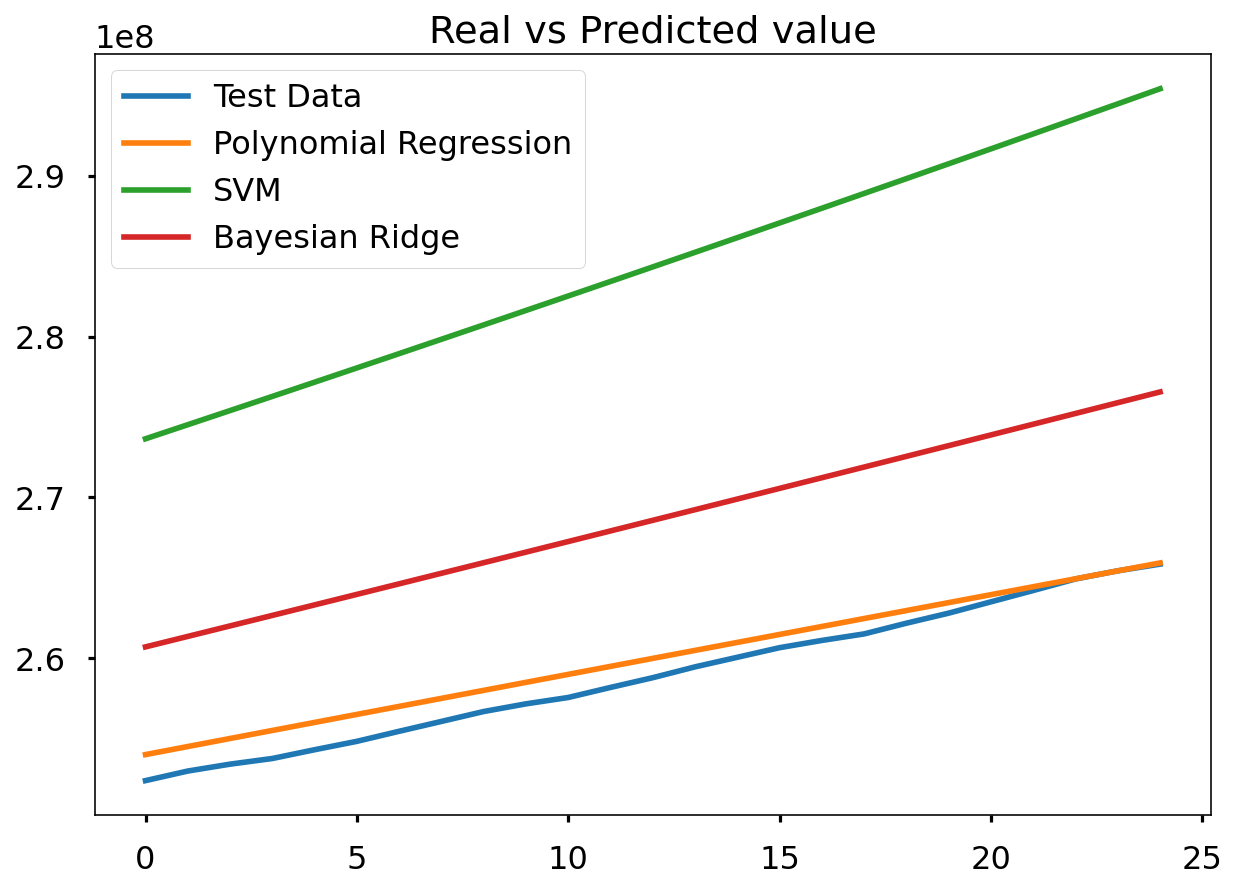

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.plot(svm_test_pred)
plt.plot(test_bayesian_pred)
plt.title('Real vs Predicted value')
plt.legend(['Test Data', 'Polynomial Regression', 'SVM', 'Bayesian Ridge'])

# Worldwide Overview 
Graphing the number of confirmed cases, deaths, and mortality rate (CFR). This gives us a big picture of the ongoing pandemic. 
 <a id='world_wide_graphs'></a>

In [ ]:
# helper method for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

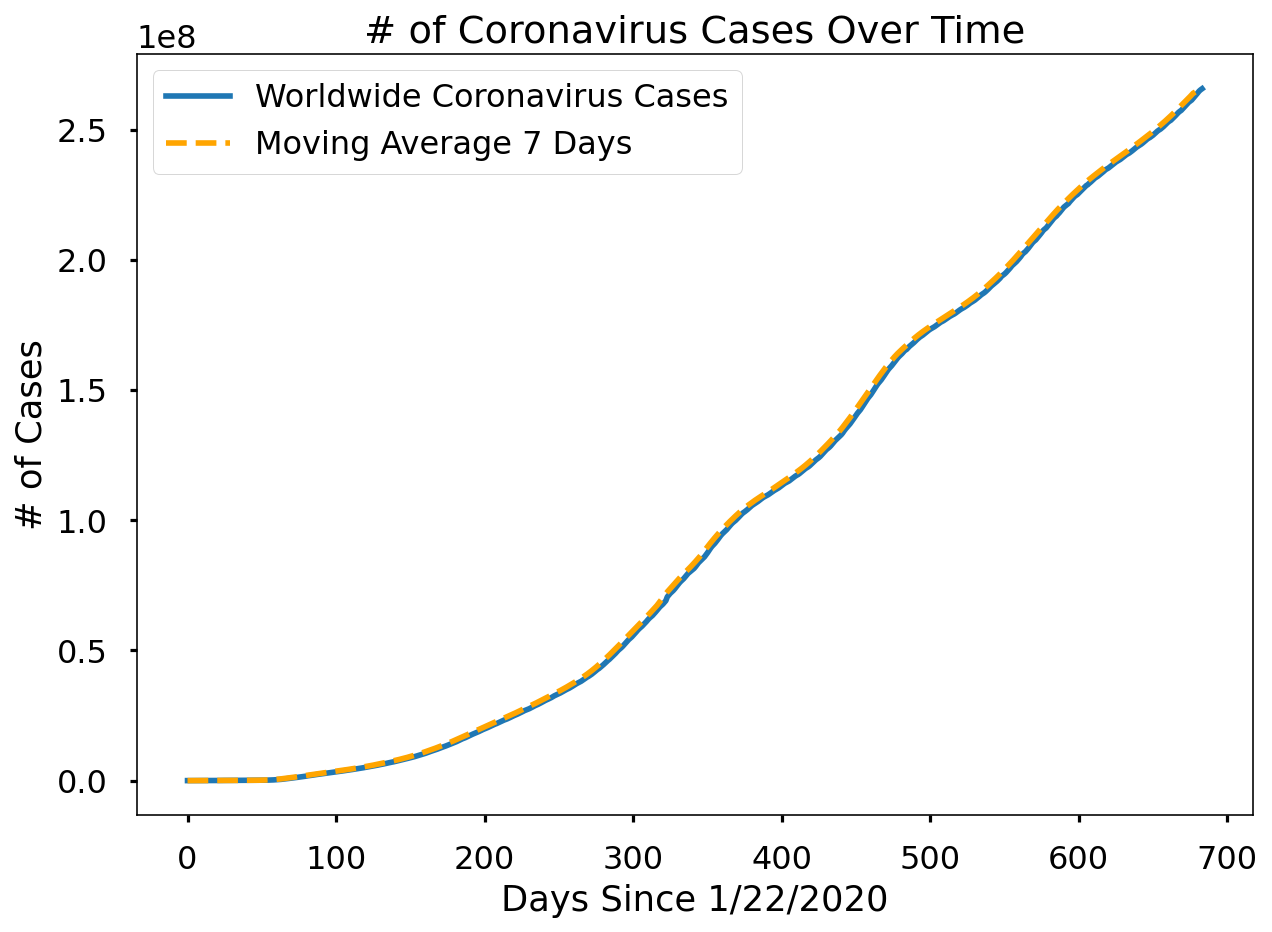

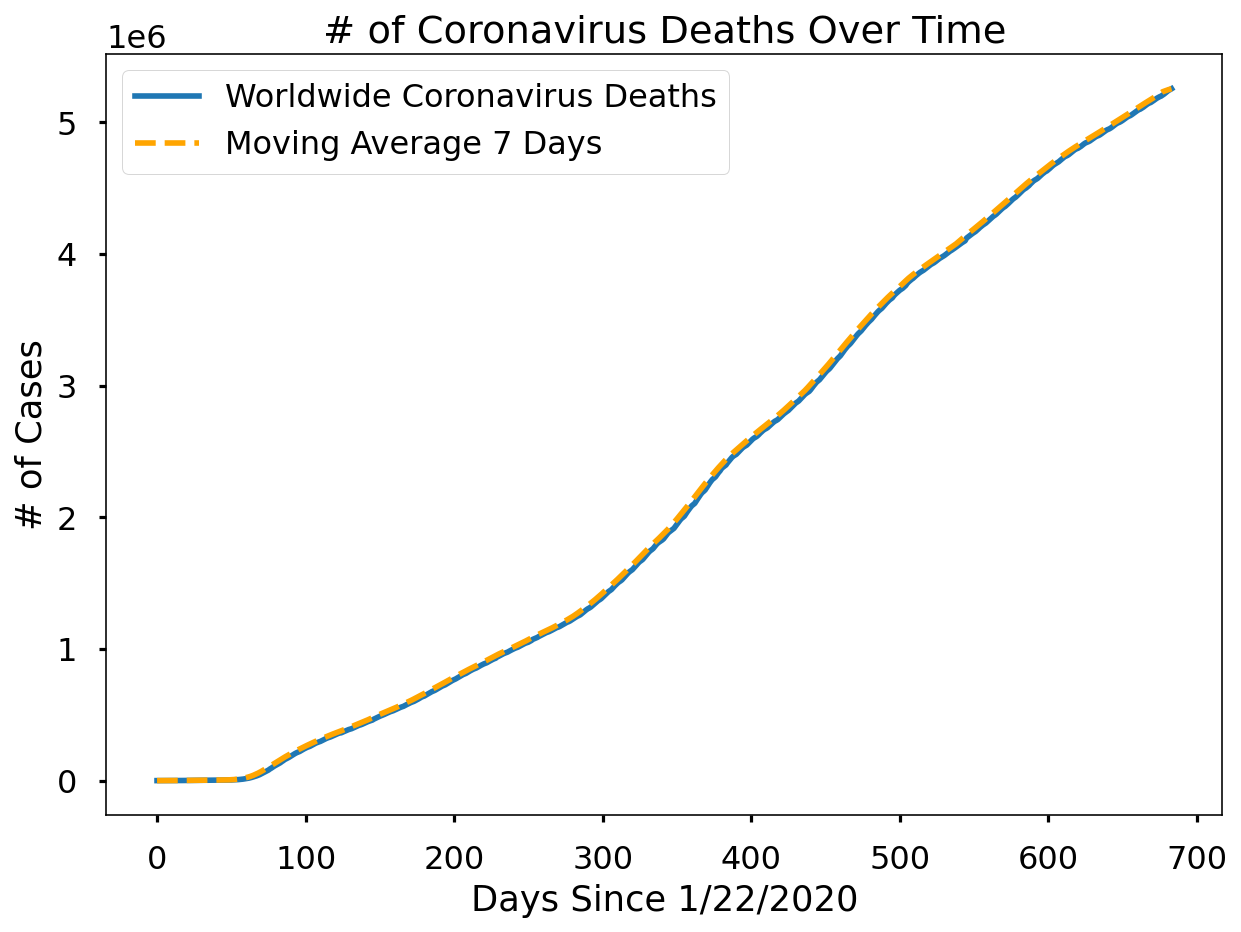

In [ ]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(10, 7))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)])
plt.xticks()
plt.yticks()
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)])
plt.xticks()
plt.yticks()
plt.show()


[557, 98, 286, 493, 684, 809, 2651, 589, 2068, 1692, 2111, 4749, 3100, 4011, 3745, 3162, 3594, 2731, 3031, 2608, 2042, 418, 15152, 6528, 2143, 2183, 2035, 1882, 500, 560, 629, 1761, 380, 568, 854, 977, 1359, 1388, 1894, 2378, 1979, 2601, 2302, 2818, 3916, 4097, 3938, 4181, 4823, 7659, 5799, 14351, 11098, 11279, 14793, 16005, 19547, 27098, 30881, 32115, 35141, 42667, 41086, 51089, 62862, 64910, 69665, 56900, 65279, 76819, 82914, 82911, 84315, 58933, 71106, 73874, 69401, 83325, 87356, 85390, 74477, 119535, 70986, 83848, 78160, 95386, 88195, 77249, 76826, 75439, 75956, 81839, 83514, 83928, 82967, 71441, 70204, 75806, 76987, 83370, 88597, 79660, 74902, 77188, 80103, 90402, 88890, 90581, 84155, 75696, 76353, 84439, 84954, 95878, 96151, 94278, 78427, 88714, 96796, 102121, 106679, 106338, 104449, 94822, 86588, 92807, 103535, 118517, 121116, 136861, 106731, 95705, 121708, 114183, 130842, 131070, 133888, 112806, 101222, 124552, 135320, 137286, 129214, 135008, 132736, 118348, 141645, 144757, 140

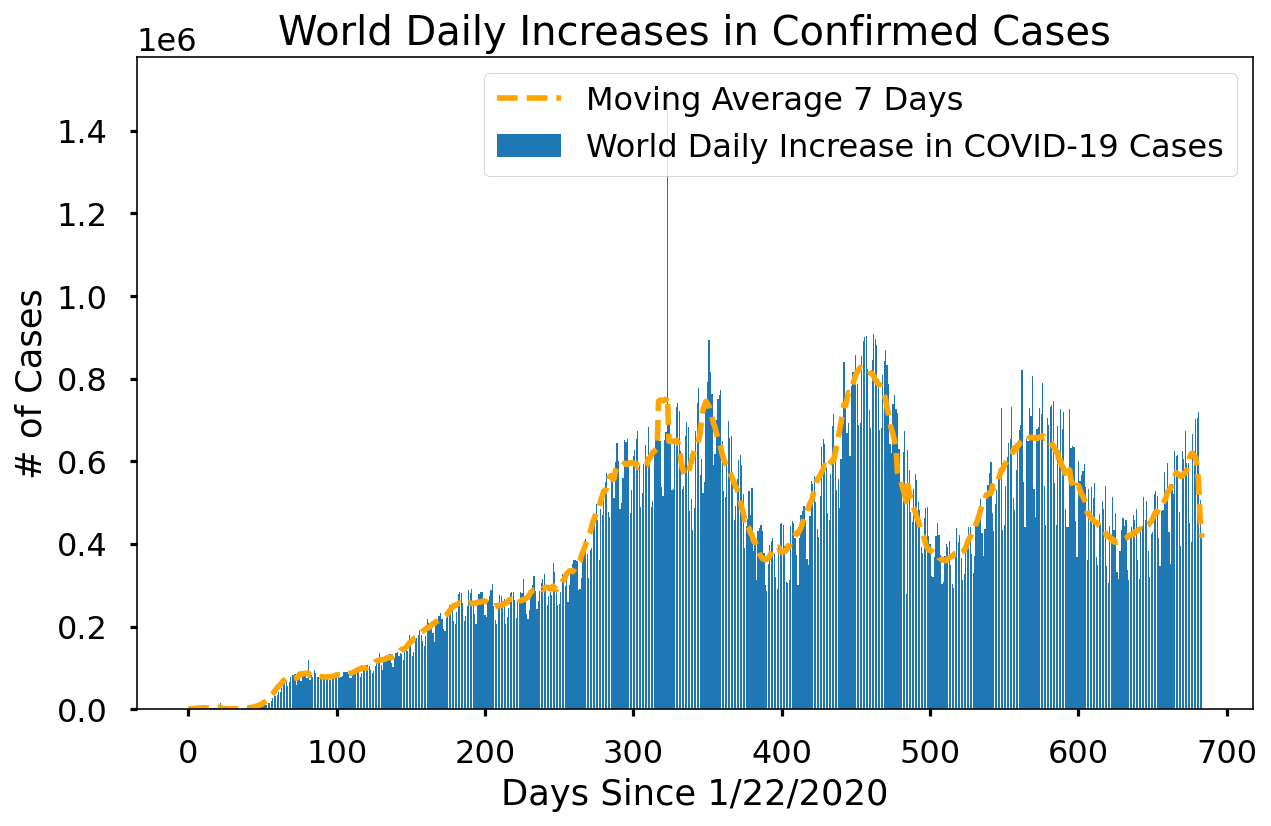

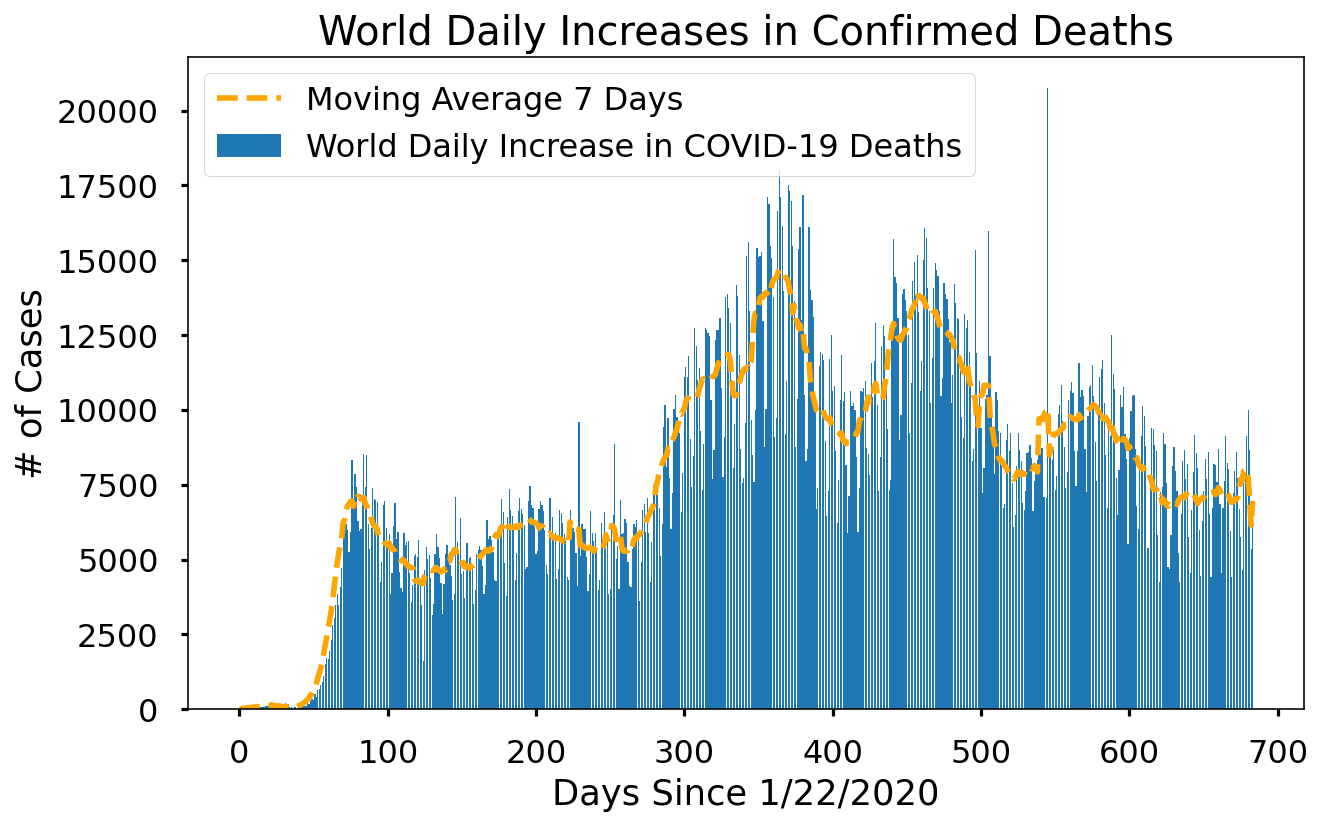

In [ ]:
plt.figure(figsize=(10, 6))
print(world_daily_increase)
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=20)
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'])
plt.xticks()
plt.yticks()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=20)
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'])
plt.xticks()
plt.yticks()
plt.show()


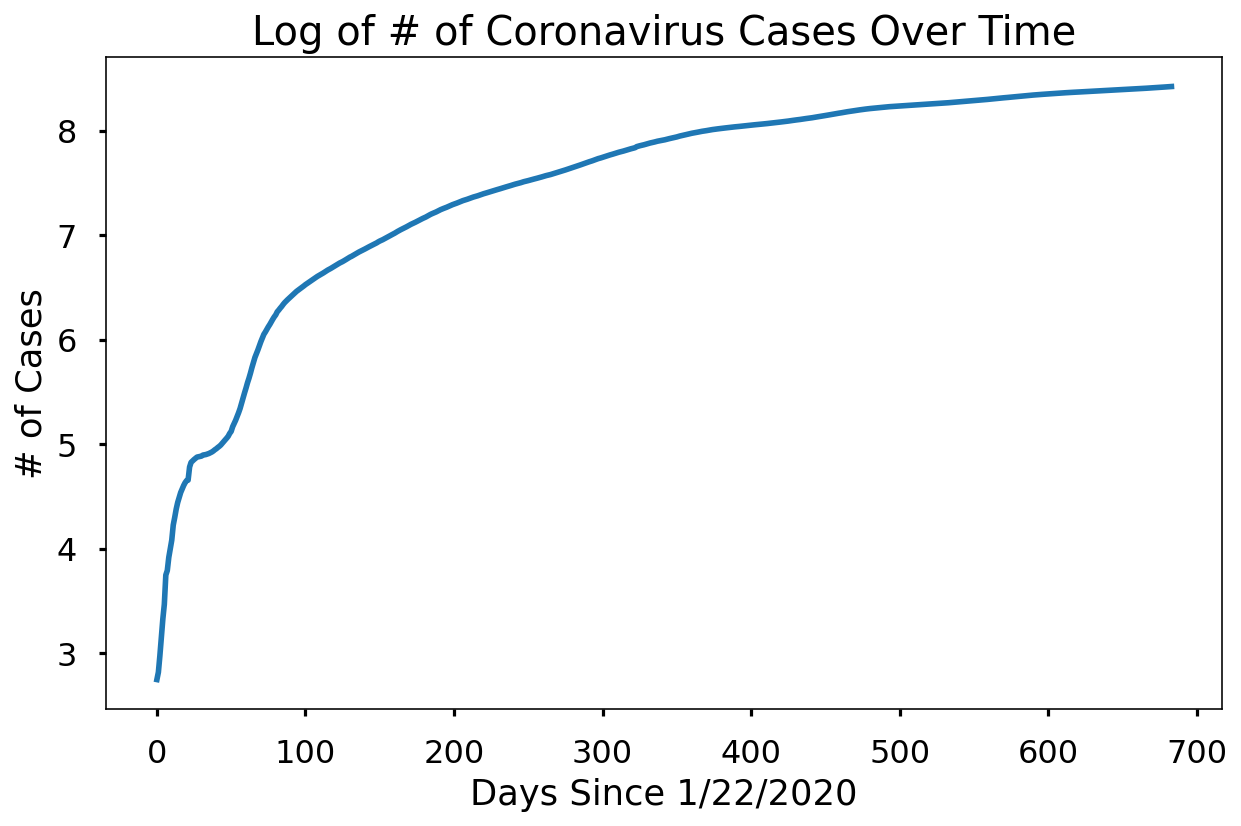

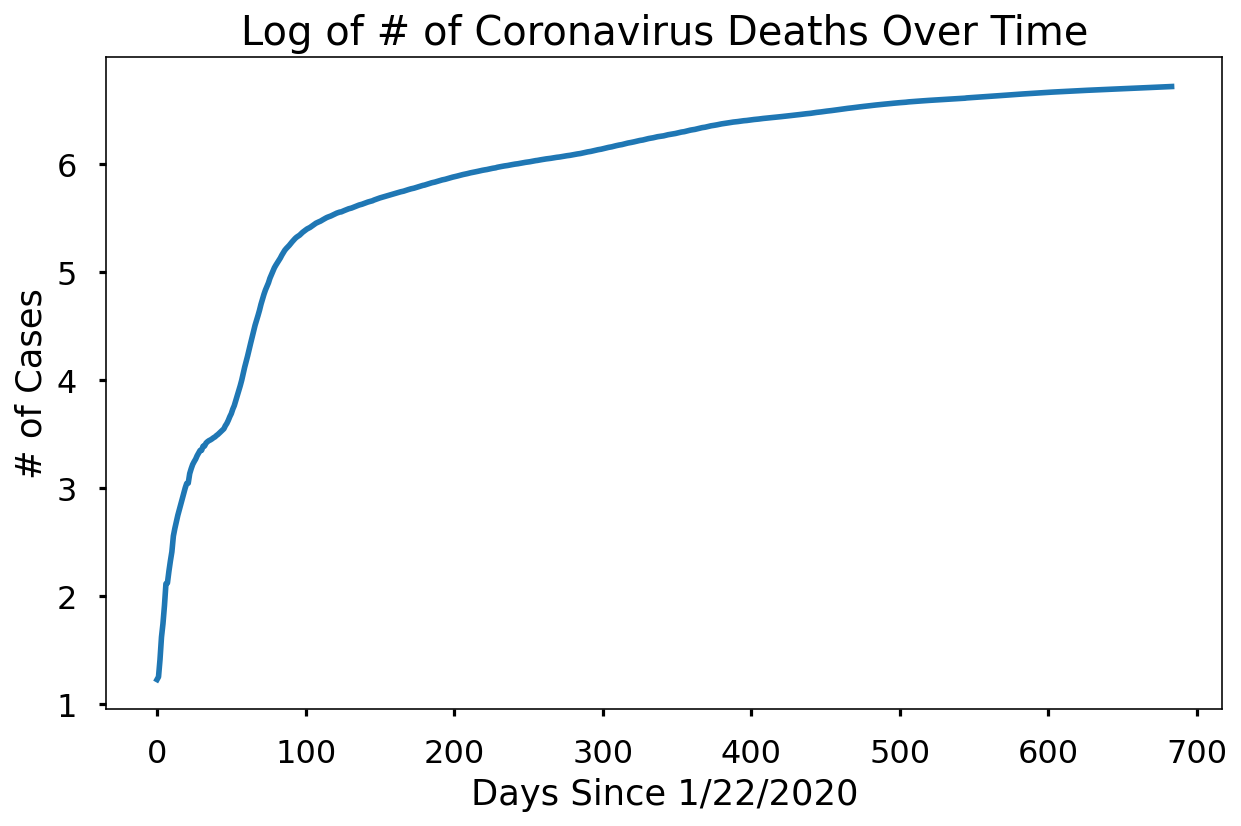

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.xticks()
plt.yticks()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=20)
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.xticks()
plt.yticks()
plt.show()


In [ ]:
def country_plot(x, y2, y3, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
#     recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 7))

    plt.subplot(121)
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)])
    plt.title('{} Daily Increases in Confirmed Cases'.format(country))
    plt.xlabel('Days Since 1/22/2020')
    plt.ylabel('# of Cases')
    plt.xticks()
    plt.yticks()

    plt.subplot(122)
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)])
    plt.title('{} Daily Increases in Deaths'.format(country))
    plt.xlabel('Days Since 1/22/2020')
    plt.ylabel('# of Cases')
    plt.xticks()
    plt.yticks()
    plt.show()

# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_deaths = country_info[1]
    country_cases = country_info[0]
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    
    country_plot(adjusted_dates, country_daily_increase, country_daily_death, country_name)
    

In [ ]:
print(confirmed_df['Country/Region'].to_list())

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 'China', 

# Country Specific Graphs
Unlike the previous section, we are taking a look at specific countries. This allows us to examine the pandemic at a local level. 
<a id='country_graphs'></a>

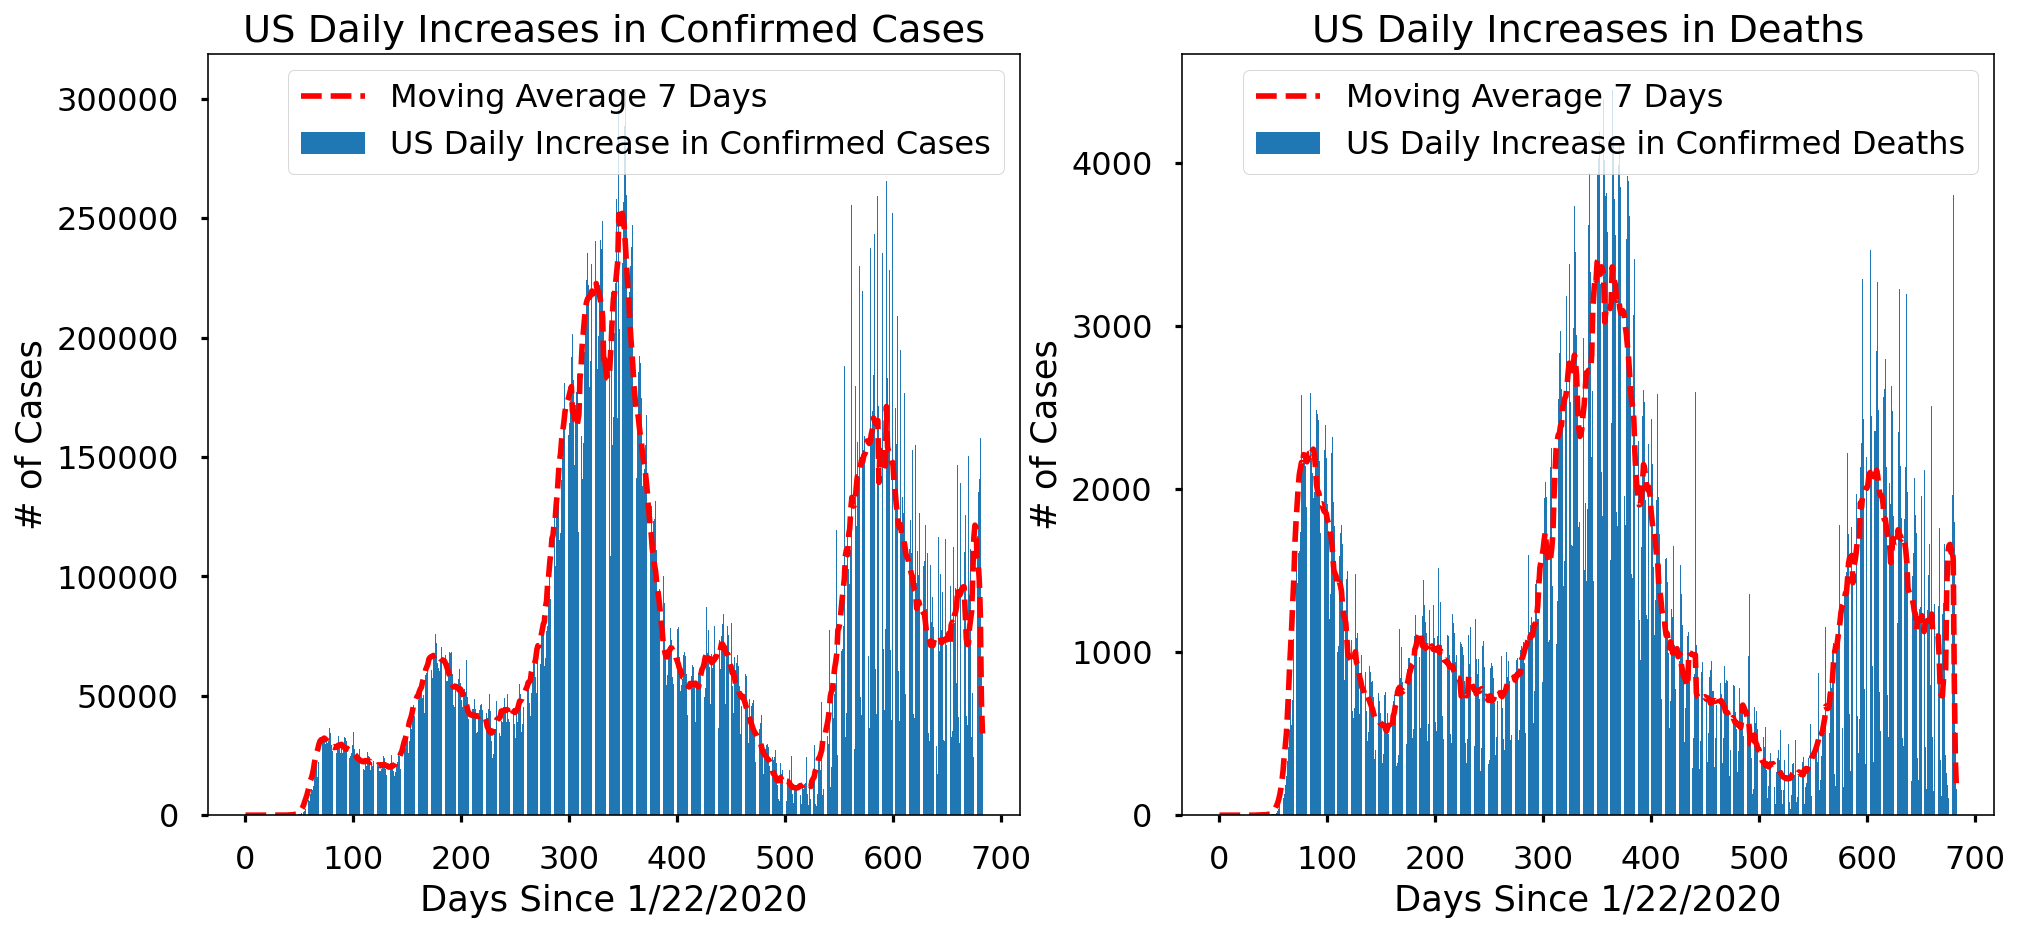

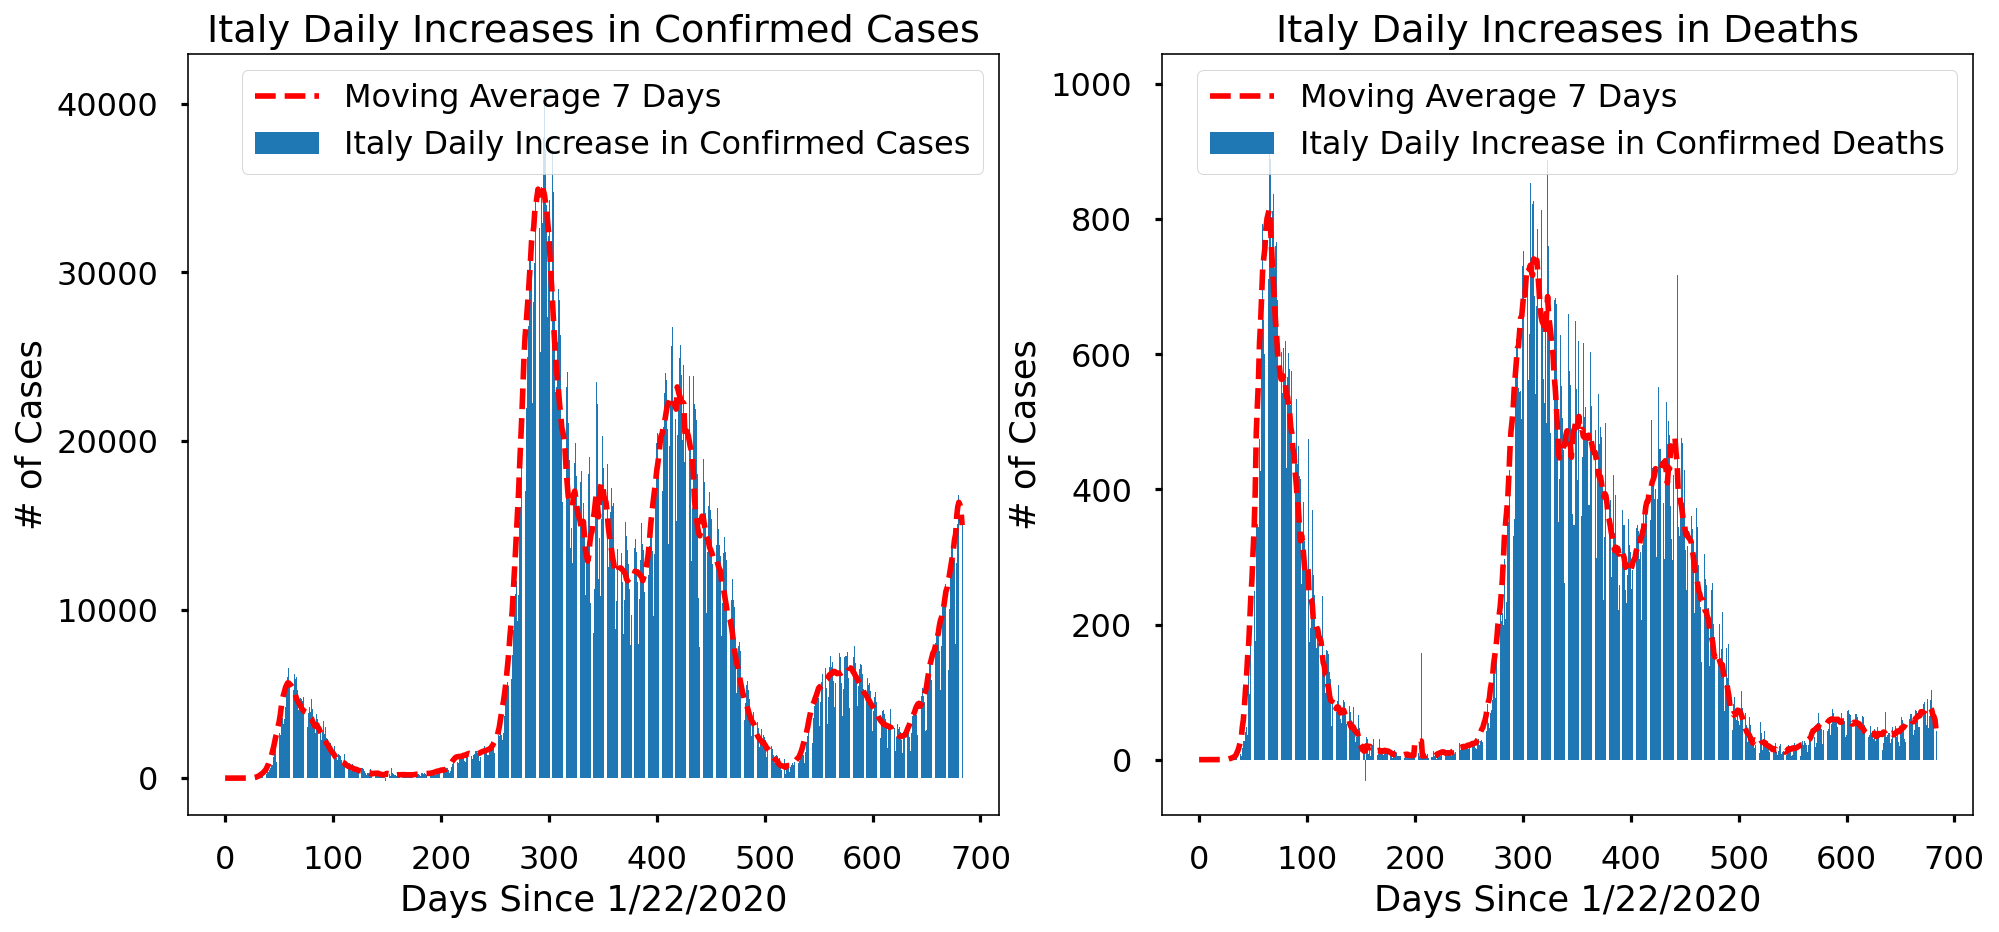

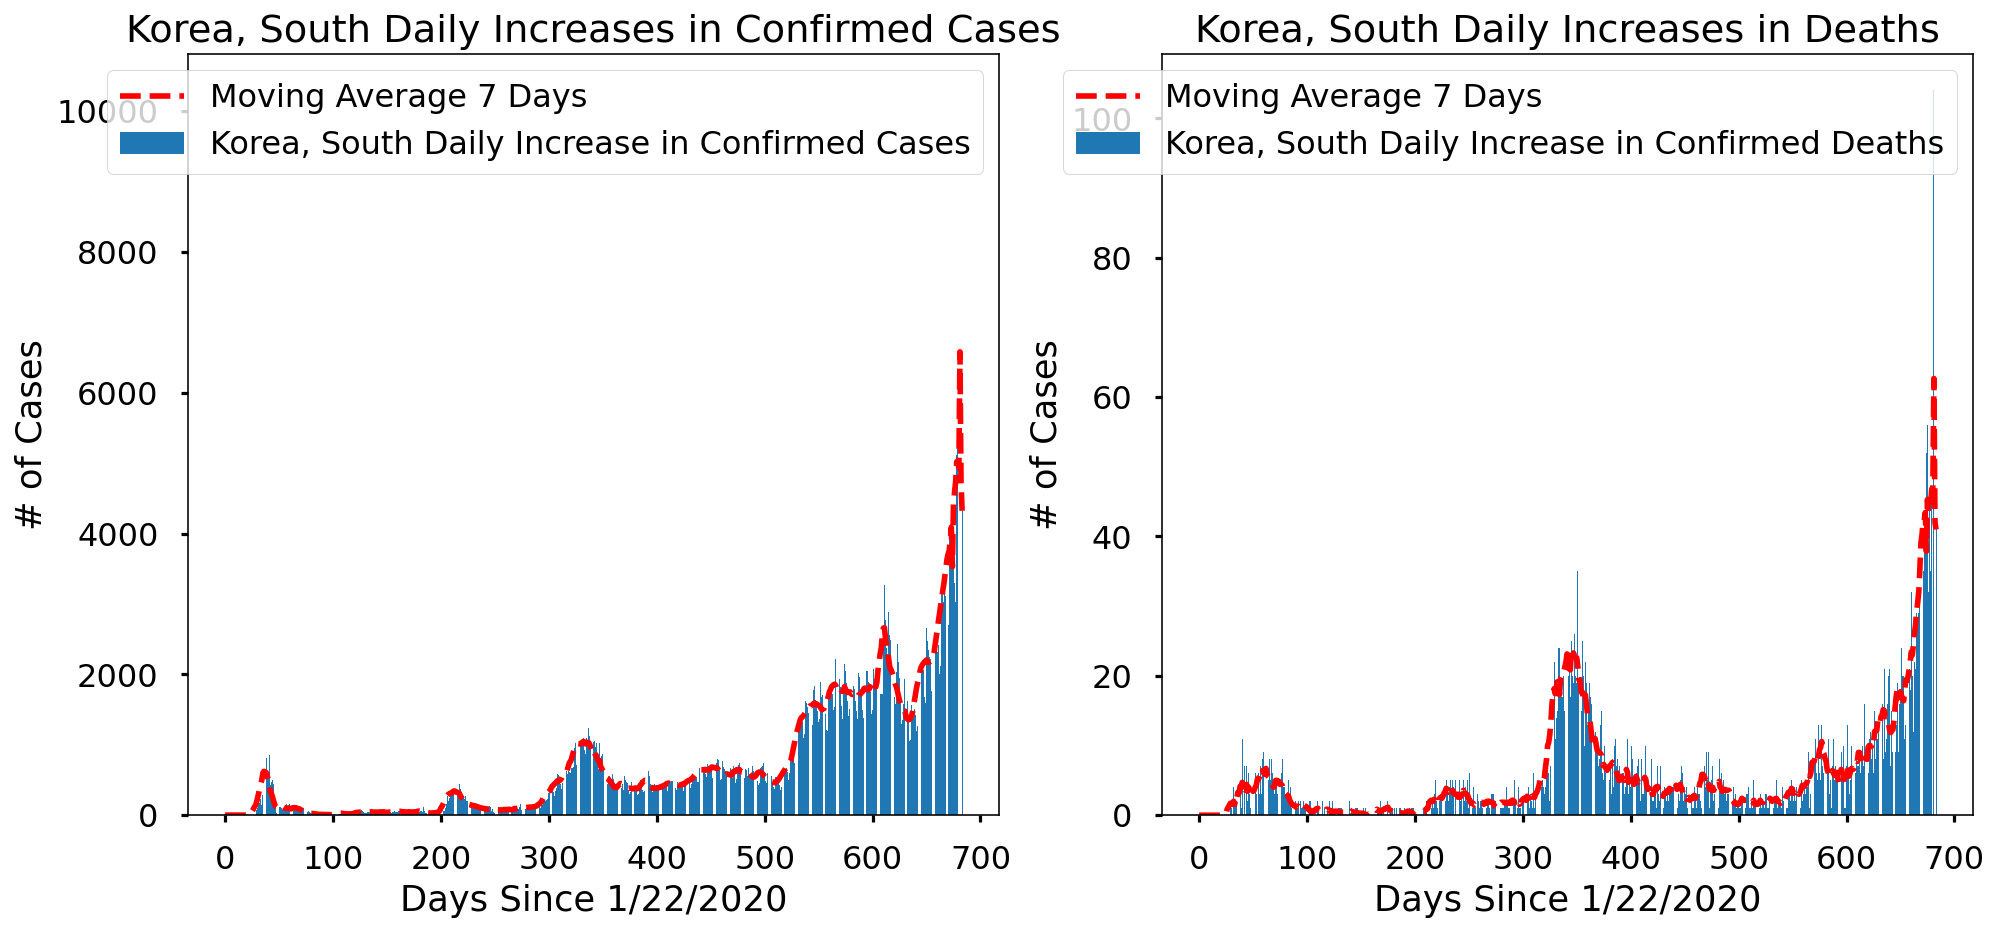

In [ ]:
countries = ['US', 'Italy', 'Korea, South'] 

for country in countries:
    country_visualizations(country)

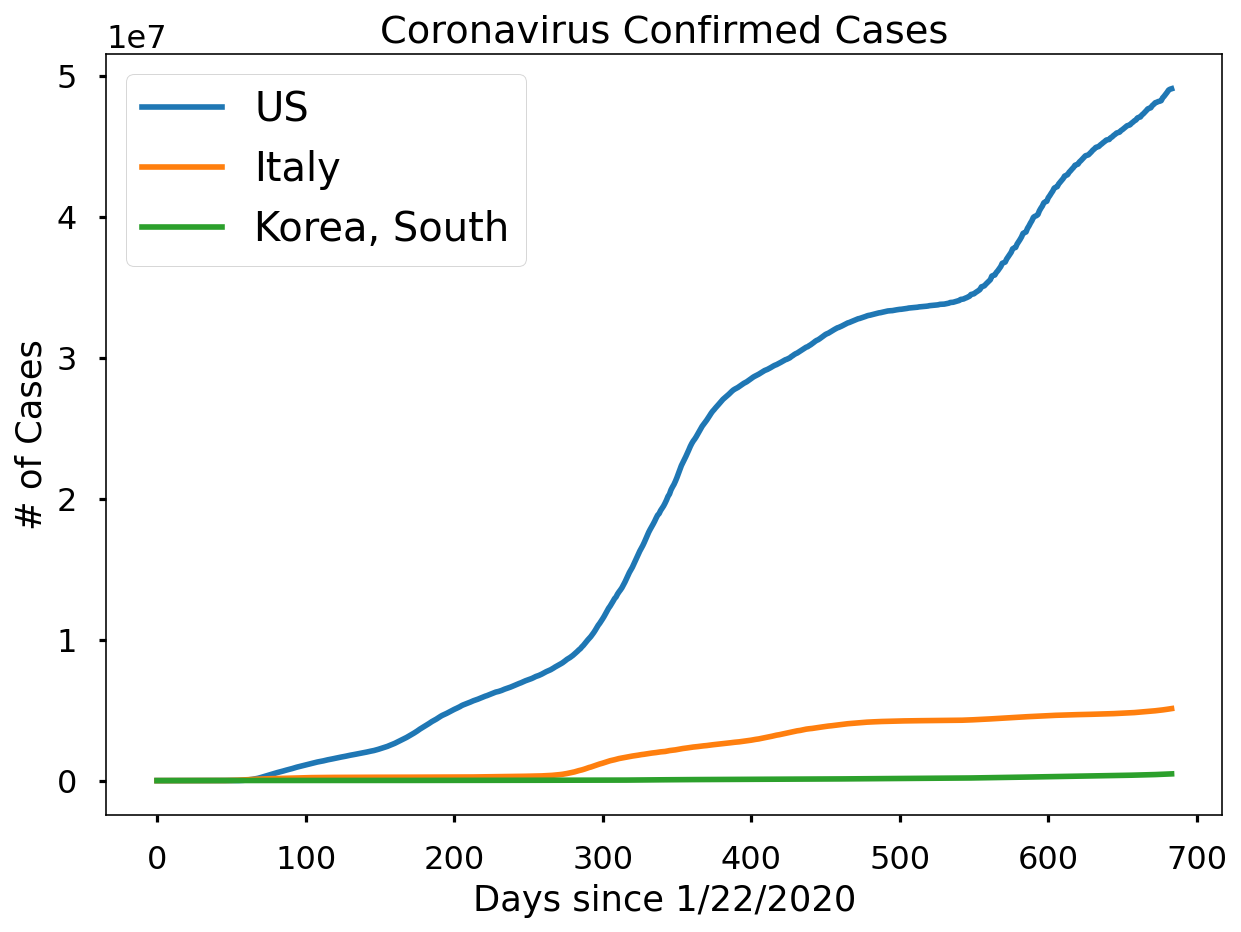

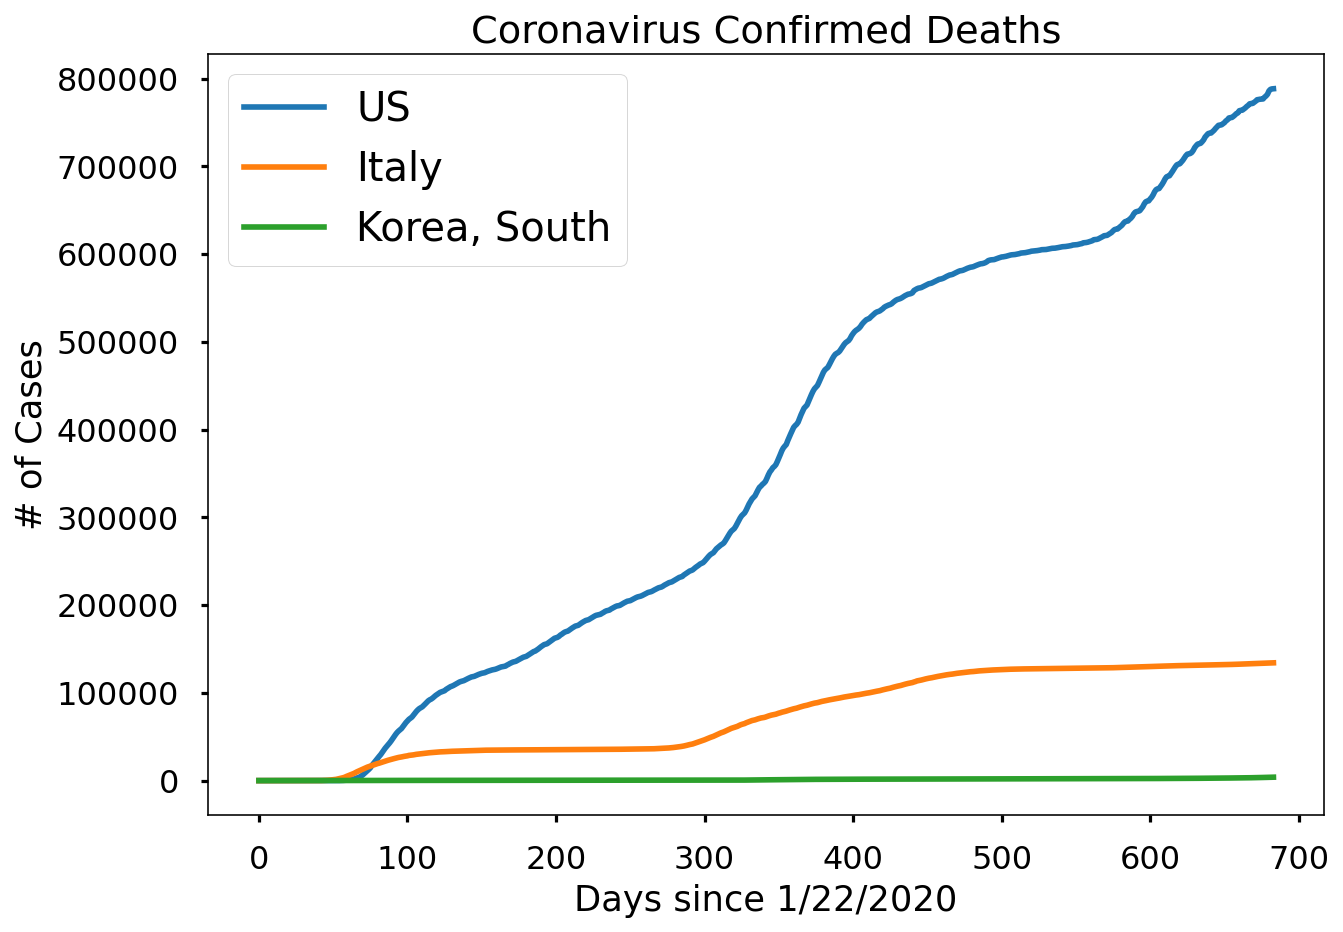

In [ ]:
# Country Comparison
# removed redundant code

compare_countries = ['US', 'Italy', 'Korea, South'] 
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths']

for num in range(2):
    plt.figure(figsize=(10, 7))
    for country in compare_countries:
        plt.plot(get_country_info(country)[num])
    plt.legend(compare_countries, prop={'size': 20})
    plt.xlabel('Days since 1/22/2020')
    plt.ylabel('# of Cases',)
    plt.title(graph_name[num])
    plt.xticks()
    plt.yticks()
    plt.show()

In [ ]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(10, 7))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=20)
    plt.xlabel('Days Since 1/22/2020')
    plt.ylabel('# of Cases')
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks()
    plt.yticks()
    plt.show()

# Predictions for confirmed coronavirus cases worldwide
These three models predict future covid cases on a global level. 

The prediction models include 
* Support Vector Machine 
* Polynomial Regression 
* Bayesian Ridge Regression 

<a id='prediction'></a>

# <font color=red> 아래 그림은 **전세계** 코로나 확진자 수 + SVM으로 추론한 결과를 보여주고 있음
# **한국** 확진자 수 + SVM으로 추론한 결과를 보여라 </font>

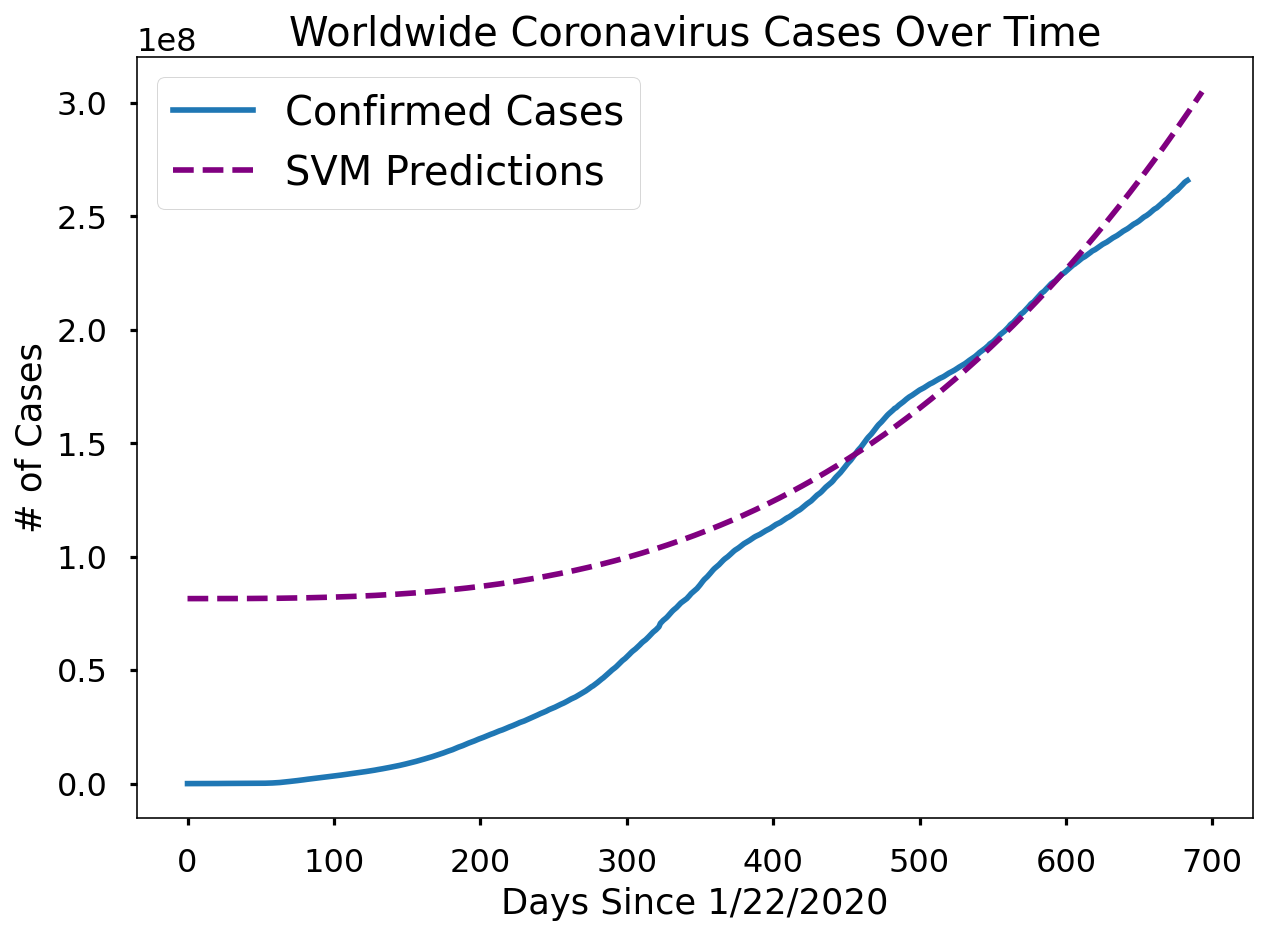

In [ ]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

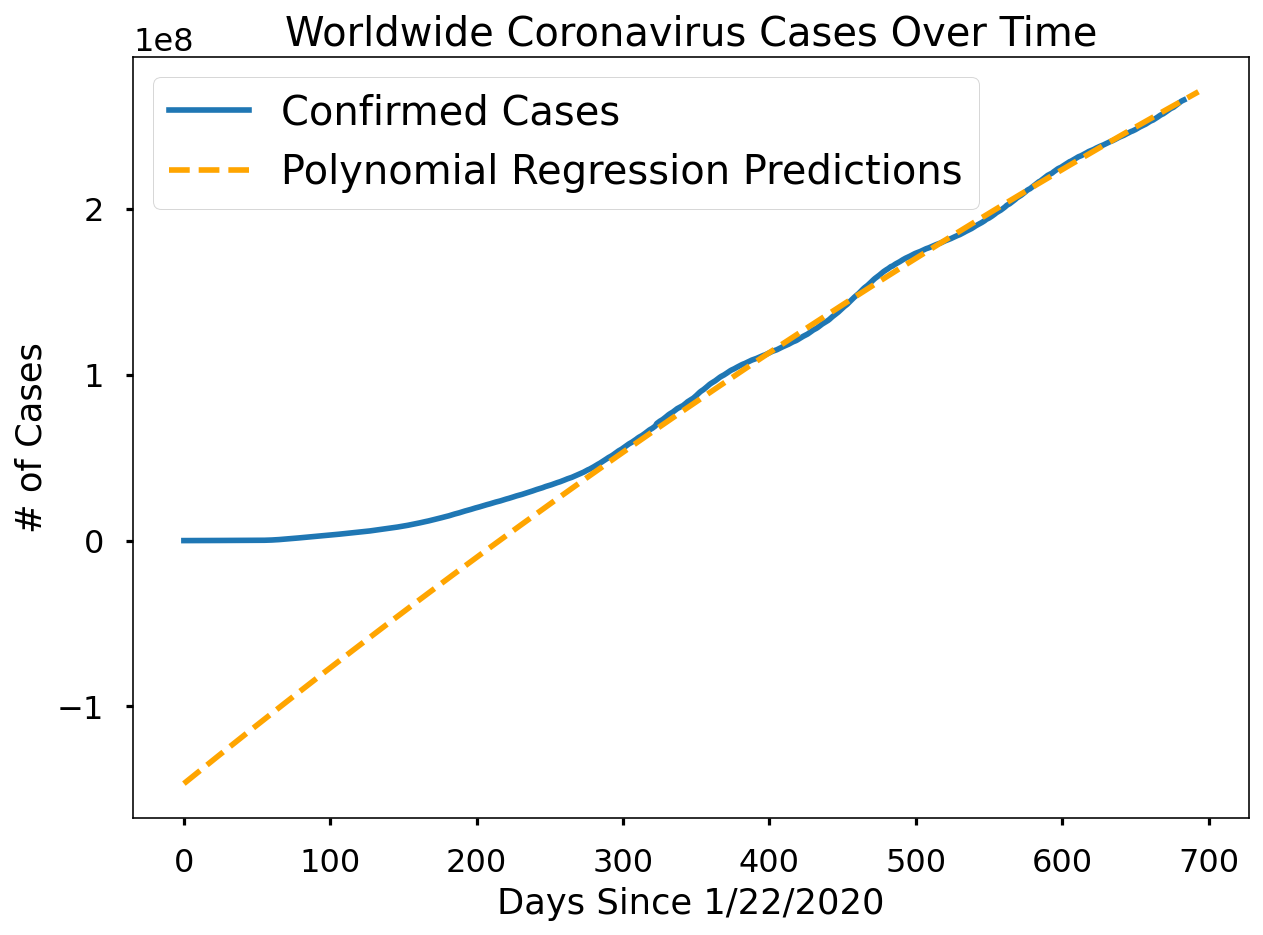

In [ ]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

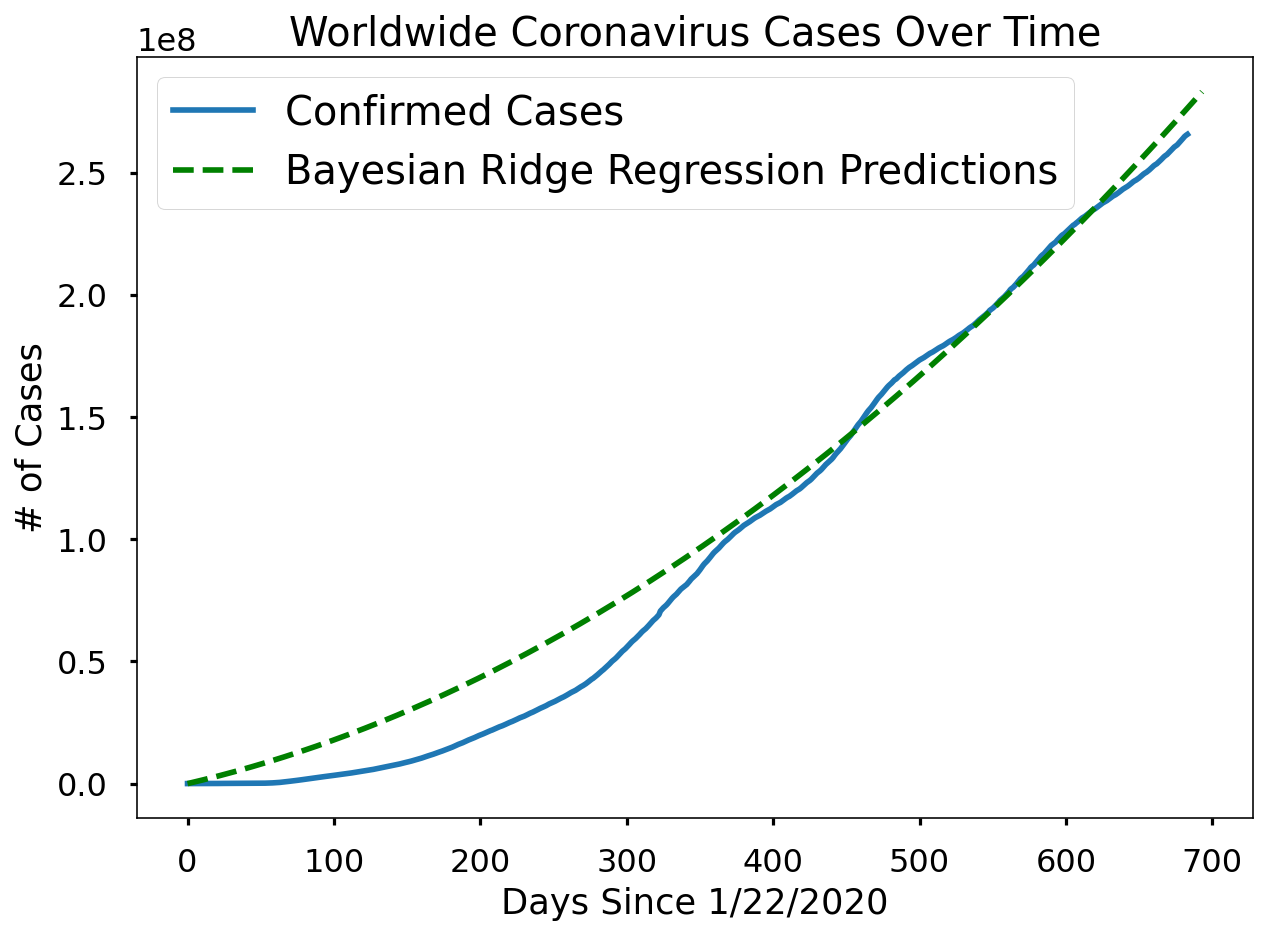

In [ ]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

# <font color=red> 아래 표는 **전세계** 코로나 확진자 수를 SVM으로 예측한 것임 (내일부터 10일동안)  
# **한국** 확진자 수를 SVM으로 예측한 결과를 보여라 </font>

In [ ]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Reds')

,Date,SVM Predicted # of Confirmed Cases Worldwide
0,12/06/2021,296350800.000000
1,12/07/2021,297294334.000000
2,12/08/2021,298240627.000000
3,12/09/2021,299189682.000000
4,12/10/2021,300141505.000000
5,12/11/2021,301096098.000000
6,12/12/2021,302053467.000000
7,12/13/2021,303013614.000000
8,12/14/2021,303976545.000000
9,12/15/2021,304942262.000000


In [ ]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

,Date,Polynomial Predicted # of Confirmed Cases Worldwide
0,12/06/2021,266420907.000000
1,12/07/2021,266912950.000000
2,12/08/2021,267404667.000000
3,12/09/2021,267896057.000000
4,12/10/2021,268387120.000000
5,12/11/2021,268877857.000000
6,12/12/2021,269368268.000000
7,12/13/2021,269858352.000000
8,12/14/2021,270348109.000000
9,12/15/2021,270837540.000000


In [ ]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Reds')

,Date,Bayesian Ridge Predicted # of Confirmed Cases Worldwide
0,12/06/2021,277230477.000000
1,12/07/2021,277901410.000000
2,12/08/2021,278573119.000000
3,12/09/2021,279245604.000000
4,12/10/2021,279918863.000000
5,12/11/2021,280592899.000000
6,12/12/2021,281267710.000000
7,12/13/2021,281943296.000000
8,12/14/2021,282619658.000000
9,12/15/2021,283296795.000000
